In [0]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression

In [0]:
#Loading the datasets

In [0]:
oecd_betterlifeindex_df = pd.read_csv("OECD_BLIData.csv", thousands= ',')
weo_df = pd.read_csv("WEO_Data.xls", delimiter='\t', encoding='latin1', na_values="n/a", thousands= ',')

Columns in OECD_better_life_index dataset

In [11]:
print(oecd_betterlifeindex_df.columns)

Index(['LOCATION', 'Country', 'INDICATOR', 'Indicator', 'MEASURE', 'Measure',
       'INEQUALITY', 'Inequality', 'Unit Code', 'Unit', 'PowerCode Code',
       'PowerCode', 'Reference Period Code', 'Reference Period', 'Value',
       'Flag Codes', 'Flags'],
      dtype='object')


Columns in WEO_ GDP dataset

In [12]:
print(weo_df.columns)

Index(['Country', 'Subject Descriptor', 'Units', 'Scale',
       'Country/Series-specific Notes', '2015', 'Estimates Start After'],
      dtype='object')


In [0]:
print(oecd_betterlifeindex_df.count), print(weo_df.count)

In [0]:
#Prepare the data by merging the dataframes (oecd_betterlifeindex_df, weo_df) on the common column 'country'
country_statistical_datadf = pd.merge(oecd_betterlifeindex_df, weo_df, on='Country') 

Columns in the new dataset prepared for analyisis

In [15]:
print(country_statistical_datadf.columns)

Index(['LOCATION', 'Country', 'INDICATOR', 'Indicator', 'MEASURE', 'Measure',
       'INEQUALITY', 'Inequality', 'Unit Code', 'Unit', 'PowerCode Code',
       'PowerCode', 'Reference Period Code', 'Reference Period', 'Value',
       'Flag Codes', 'Flags', 'Subject Descriptor', 'Units', 'Scale',
       'Country/Series-specific Notes', '2015', 'Estimates Start After'],
      dtype='object')


In [0]:
print(country_statistical_datadf.count)

Get the subset dataframe with life satisfaction as the indicator

In [22]:
country_Life_Satisfactiondf = country_statistical_datadf[country_statistical_datadf["Indicator"] == "Life satisfaction"]
country_Life_Satisfactiondf

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
46,AUS,Australia,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,7.3,NaN,NaN,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",50961.865,2014.0
47,AUS,Australia,SW_LIFS,Life satisfaction,L,Value,MN,Men,AVSCORE,Average score,0,Units,NaN,NaN,7.2,NaN,NaN,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",50961.865,2014.0
48,AUS,Australia,SW_LIFS,Life satisfaction,L,Value,WMN,Women,AVSCORE,Average score,0,Units,NaN,NaN,7.4,NaN,NaN,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",50961.865,2014.0
49,AUS,Australia,SW_LIFS,Life satisfaction,L,Value,HGH,High,AVSCORE,Average score,0,Units,NaN,NaN,7.5,NaN,NaN,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",50961.865,2014.0
108,AUT,Austria,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,7.1,NaN,NaN,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",43724.031,2015.0
109,AUT,Austria,SW_LIFS,Life satisfaction,L,Value,MN,Men,AVSCORE,Average score,0,Units,NaN,NaN,7.1,NaN,NaN,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",43724.031,2015.0
110,AUT,Austria,SW_LIFS,Life satisfaction,L,Value,WMN,Women,AVSCORE,Average score,0,Units,NaN,NaN,7.1,NaN,NaN,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",43724.031,2015.0
111,AUT,Austria,SW_LIFS,Life satisfaction,L,Value,HGH,High,AVSCORE,Average score,0,Units,NaN,NaN,7.6,NaN,NaN,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",43724.031,2015.0
170,BEL,Belgium,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,6.9,NaN,NaN,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",40106.632,2014.0
171,BEL,Belgium,SW_LIFS,Life satisfaction,L,Value,MN,Men,AVSCORE,Average score,0,Units,NaN,NaN,6.9,NaN,NaN,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",40106.632,2014.0


In [0]:
X = np.c_[country_Life_Satisfactiondf["2015"]]
Y = np.c_[country_Life_Satisfactiondf["Value"]]

Visualization of GDP information of 2015 against the Average Score LIfe Satisfaction of each country

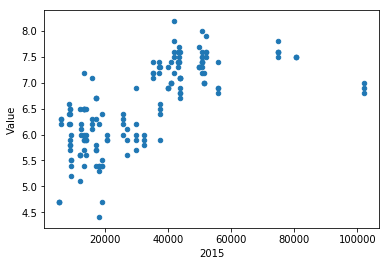

In [49]:
country_Life_Satisfactiondf.plot.scatter(x="2015", y="Value")
plt.show()

Select a linear model

In [0]:
linear_regression_model = sklearn.linear_model.LinearRegression()

Train a model

In [48]:
linear_regression_model.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

New instance for test

In [0]:
X_new = [[22587]] # GDP_ per capita information for the country Cyprus

Value predicted on new instance

In [41]:
print(linear_regression_model.predict(X_new)) # Average score of Life Satisfaction computed

[[6.29666129]]
